# 11. Further Issues in Using OLS with Time Series Data

## 11.1. Asymptotics with Time Series

### Example 11.4: Efficient Markets Hypothesis

In [1]:
import wooldridge as woo
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from supplementaryFunctions import *

### <center>Gauss-Markov Assumptions</center>

|Assumption No.|Brief Summary|Description|
|---|---|---|
|$MLR.1$| Linear in Parameters: $y = \beta_0 + \beta_1x+u$| In the population model, the dependent variable, $y$, is related to the independent variable, $x$, and the error term, $u$ where $\beta_0$ and $\beta_1$ are the population intercept and slope parameters, respectively.|
|$MLR.2$| Random Sampling of $x$ and $y$ from the Population|We have a random sample of size $n$, ${(x_i,y_i): i = 1,2,...,n}$, following the population model in Assumption MLR.1.|
|$MLR.3$| No Perfect Collinearity | In the sample (and therefore the population), none of the independent variables is constant, and there are no exact _linear_ relationships among the independent variables|
|$MLR.4$| Zero Conditional Mean: $E(u|x_1, x_2, . . . , x_k)=0$|The error $u$ has an expected value of zero given any values of the independent variables|
|$MLR.5$| Homoscedasticity: $Var(u|x_1, x_2, . . . , x_k) = \sigma^2$|The error $u$ has constant variance given any value of the explanatory variables|

### <center>Properties of OLS</center>
|Theorem No.|Summary|Description|
|---|---|---|
|Theorem 3.1|Unbiasedness of OLS| Under $MLR.1-MLR.4$, all parameter estimators are unbiased: $E(\hat{\beta_j})=\beta_j, j=0,1,...,k$|
|Thereom 3.2| Sampling Variances of the OLS Slope Estimators |Under Assumptions $MLR.1-MLR.5$, conditional on the sample values of the independent variables, $Var(\hat{\beta_j})=\frac{\sigma^2}{SST_j(1-R_j^2)'}$, for $j = 1,2, . . ., k$, where $SST_j=\sum_{i=1}^{n}{(x_{ij}-\bar{x_j})^2}$ is the total sample variation in $x_j$, and $R_j^2$ is the $R$-squared from regressing $x_j$ on all other independent variables (and including an intercept). |
|Thereom 3.3| Unbiased Estimation of $\sigma^2$ | Under $MLR.1-MLR.5$, variance of estimator is unbiased: $E(\hat{\sigma}^2) = \sigma^2$|
|Theorem 3.4|Gauss-Markov Theorem|Under Assumptions $MLR.1-MLR.5$, $\hat{\beta_0}$,$\hat{\beta_1}$, ..., $\hat{\beta_k}$ are the __best linear unbiased estimators (BLUEs)__ of $\beta_0$,$\beta_1$, . . . , $\beta_k$, respectively.

#### Log-Difference and Time Series

The value of differenced logs is approximately the rate of change. We can treat parameter estimates of a regression with log-differenced independent and dependent variables as indicating the percent change in the depedent variable that results from a 1 percent change in the explanatory variable.

$$r_t=log(p_t) - log(p_{t-1}) \approx \frac{p_t - p_{t-1}}{p_{t-1}}$$

In [2]:
tickers = ["TSLA", "AAPL"]#, "MSFT", "IBM", "GOOGL"]
start = datetime.datetime(2010,1,1)
end = datetime.datetime.today()

data = pdr.data.DataReader(tickers, "yahoo", start, end)["Adj Close"]
log_data = np.log(data)
ret = log_data.diff()


In [3]:
ret.dropna()

Symbols,TSLA,AAPL
Date,,
2010-06-30,-0.002515,-0.018279
2010-07-01,-0.081723,-0.012200
2010-07-02,-0.134312,-0.006217
2010-07-06,-0.175470,0.006821
2010-07-07,-0.019430,0.039587
...,...,...
2022-07-29,0.056238,0.032267
2022-08-01,0.000426,-0.006172
2022-08-02,0.011073,-0.009331


Text(0, 0.5, 'Daily Returns')

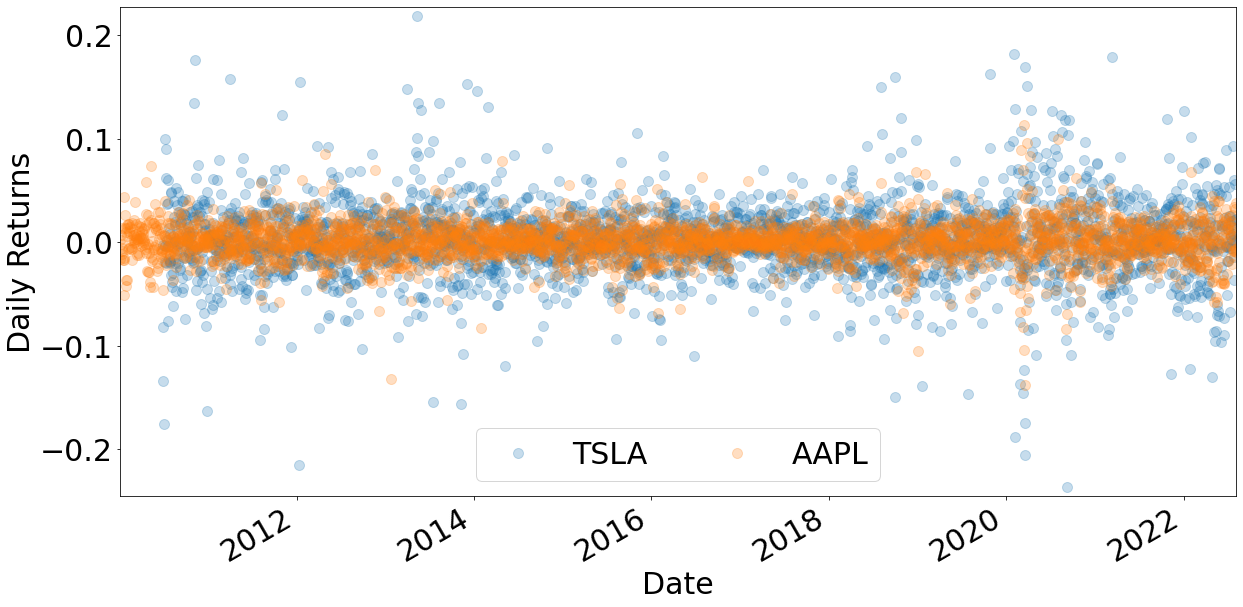

In [4]:
plt.rcParams['axes.ymargin'] = 0.02
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 30})
fig, ax = plt.subplots(figsize = (20,10))
ret.plot(legend = False,ls = "", marker = "o", markersize = 10, alpha = .25, ax = ax)
plt.legend(ncol = 3)
ax.set_ylabel("Daily Returns")

In [5]:
lags = 3
regs = {}
for key in ret:
    regs[key] = {"Regression":{},
       "Results":{}}

    formula = key + " ~ "
    for lag in range(1, lags + 1):
#         ret[key + "_lag" + str(lag)] = ret[key].shift(lag)
        if lag != 1:
            formula = formula + " + "
        formula = formula + key + ".shift(" + str(lag) + ")"
        regs[key]["Regression"][lag] = smf.ols(formula = formula,
                                         data = ret.dropna())
        regs[key]["Results"][lag] = regs[key]["Regression"][lag].fit()
for key in regs:
    for lag in range(1, lags + 1):
        print(OLS_summary(regs[key]["Results"][lag]))

               $\beta $     $t$  $$P>|t|$$    $SE$
$$r^2: 0.0$$                                      
Intercept        0.0017  2.6712     0.0076  0.0006
TSLA.shift(1)   -0.0014 -0.0797     0.9365  0.0181
               $\beta $     $t$  $$P>|t|$$    $SE$
$$r^2: 0.0$$                                      
Intercept        0.0018  2.7089     0.0068  0.0006
TSLA.shift(1)   -0.0015 -0.0847     0.9325  0.0181
TSLA.shift(2)    0.0011  0.0585     0.9534  0.0181
                 $\beta $     $t$  $$P>|t|$$    $SE$
$$r^2: 0.0001$$                                     
Intercept          0.0018  2.7595     0.0058  0.0006
TSLA.shift(1)     -0.0045 -0.2475     0.8046  0.0181
TSLA.shift(2)      0.0009  0.0510     0.9593  0.0181
TSLA.shift(3)      0.0109  0.6015     0.5475  0.0181
                 $\beta $     $t$  $$P>|t|$$    $SE$
$$r^2: 0.0027$$                                     
Intercept          0.0011  3.2794     0.0011  0.0003
AAPL.shift(1)     -0.0519 -2.8655     0.0042  0.0181
           

In [6]:
OLS_summary(regs["AAPL"]["Results"][3])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0033$$,,,,
Intercept,0.0011,3.3397,0.0008,0.0003
AAPL.shift(1),-0.0517,-2.8530,0.0044,0.0181
AAPL.shift(2),0.0058,0.3201,0.7489,0.0182
AAPL.shift(3),-0.0226,-1.2454,0.2131,0.0181


In [7]:
OLS_summary(regs["TSLA"]["Results"][3])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0001$$,,,,
Intercept,0.0018,2.7595,0.0058,0.0006
TSLA.shift(1),-0.0045,-0.2475,0.8046,0.0181
TSLA.shift(2),0.0009,0.0510,0.9593,0.0181
TSLA.shift(3),0.0109,0.6015,0.5475,0.0181


## 11.2. The Nature of Highly Persistent Time Series

### Random Walk Hypothesis

$$y_t = y_{t-1} + e_t$$

$$ y_t = y_0 + e_1 + e_2 + ... + e_{t-1} + e_t $$

$$Var(y_t|y_0) = \sigma_e^2t$$

Data that is a random walk is a function of the value in the previous periods (as opposed to being drawn from a distribution whose mean is defined by a constant or a line. Rather, the new value is drawn from a distribution $E$ wherek $\bar{E}$ is a constant. Below, we assume $\bar{E}=0$.

In [8]:
x_range = np.linspace(0, 100, num = 101)
simulations = {}

for r in range(1000):
    e = stats.norm.rvs(0,1, size = 101)
    e[0] = 0
    simulations[r] = np.cumsum(e)
simulations = pd.DataFrame(simulations)
simulations.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.343638,-2.075911,0.599997,0.815682,-0.077745,1.118108,-0.929281,0.664104,0.732440,0.521139,...,-0.535341,1.336819,-0.784662,0.627573,0.171894,-0.705879,-1.477890,-0.152619,-0.160150,0.350894
2,-1.209101,-1.313111,0.235146,2.886926,0.767624,0.694199,-0.925008,0.338104,1.073356,0.648892,...,-1.265791,2.196934,-2.785783,-0.053006,-1.448583,-3.009840,-1.615977,-1.539675,-1.875617,1.489220
3,0.434294,-1.919933,-0.509188,3.630252,1.302589,1.117175,-0.768883,-0.287952,1.137929,0.852663,...,-0.674748,1.097850,-1.758796,0.738249,-0.920896,-1.969401,-2.548349,-2.594865,-3.689655,3.023248
4,1.598942,-1.460156,0.538785,2.298780,1.229864,1.656308,-1.253101,-0.353954,1.348281,1.657291,...,-1.222331,-0.237277,-1.429335,1.627370,-0.044777,-2.794158,0.513711,-2.574683,-2.079243,2.923744


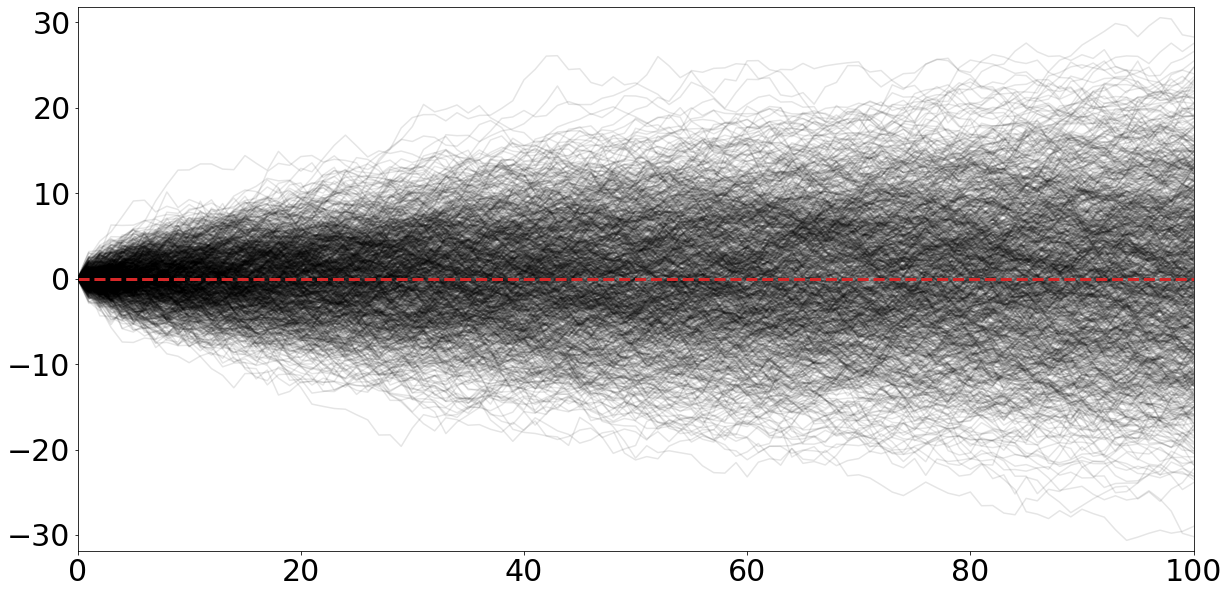

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
simulations.plot.line(alpha = .1, color = "k", ax = ax, legend = False)
ax.axhline(0, ls = "--", color = "C3", linewidth = 3)


If that $\bar{E} \ne 0$, the the the function is described as a random walk with drift. We describe $\bar{E}$ as $\alpha_0$.

$$y_t = \alpha_0 + y_{t-1} + e_t$$

$$ y_t = y_0 + \alpha_0t + e_1 + e_2 + ... + e_{t-1} + e_t $$

We can $\bar{E} \ne0$ using OLS regression with a lag. If the value of an observation is simply a function of the past value plus some error, all variation should be explained by the lag term

In [10]:
def monte_carlo_simulation(e_bar = 0, periods = 101, num_simulations = 100):
    x_range = np.linspace(0, periods - 1, 
                          num = periods)
    simulations = {}
    for r in range(num_simulations):
        e = stats.norm.rvs(e_bar, 1, size = periods)
        e[0] = 0
        simulations[r] = np.cumsum(e)
    simulations = pd.DataFrame(simulations)
    return simulations

e_bar = 2
periods = 200
num_simulations = 2000
simulations = monte_carlo_simulation(e_bar = e_bar, 
                                     periods = periods, 
                                     num_simulations = num_simulations)
simulations

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.595295,0.931130,2.048693,2.189868,2.613761,3.011134,4.368579,2.712502,0.750561,1.881162,...,2.150416,4.208559,1.810204,2.399945,-0.878031,2.908893,0.848377,0.676687,2.296773,3.907176
2,4.252713,3.298485,4.485908,3.943686,4.039051,4.983597,5.125862,3.645966,2.806439,3.904262,...,4.763899,7.234107,3.481115,6.106567,2.668559,4.271737,3.480047,3.078040,4.402441,5.695415
3,7.167562,5.083037,7.693107,4.682014,4.201600,7.090956,5.499127,3.995043,3.592568,6.105876,...,4.611265,8.339590,4.653812,9.386508,4.326777,5.755223,2.586826,3.494773,5.733379,8.235666
4,9.055765,8.813445,10.818275,5.705332,6.146428,10.014159,6.526993,5.476630,4.269268,6.909230,...,5.886374,10.518600,5.285989,11.586202,5.227545,7.430548,4.907379,6.332546,9.082276,10.517231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,381.091437,419.027467,408.556278,391.177254,380.565880,382.900725,389.568830,385.347948,379.899160,370.896996,...,384.867275,382.635493,362.115725,402.328298,388.087200,390.977921,369.795679,378.703182,402.355124,383.293500
196,384.425357,421.030273,410.195937,392.634375,382.831551,384.864743,390.674329,388.333247,381.474452,374.197750,...,384.370432,385.943705,364.167121,404.158899,390.730461,393.589914,371.309305,382.289052,402.402663,384.780574
197,386.150246,424.380552,411.689623,394.206365,384.189855,385.859011,393.728708,390.329616,382.133790,377.459770,...,387.235544,388.695103,365.965531,406.010368,393.351689,397.699124,375.992336,385.048405,404.139975,387.134778
198,389.433358,426.509700,411.733946,395.941063,385.102962,388.455679,395.503649,393.651510,384.068994,380.245400,...,389.952475,391.139970,369.569355,406.207726,396.446935,397.571985,378.838304,386.912081,405.657277,389.440298


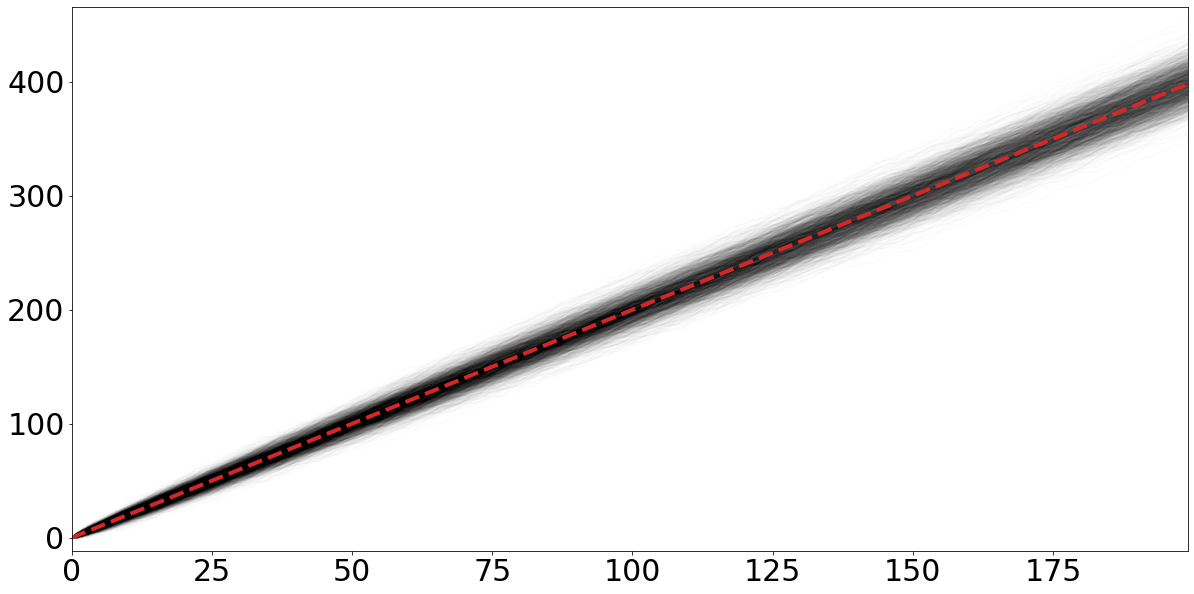

In [11]:
fig, ax = plt.subplots(figsize = (20,10))
simulations.plot.line(alpha = .01, 
                      color = "k", 
                      ax = ax, 
                      legend = False)
ax.plot(np.arange(periods), np.arange(periods) * e_bar, ls = "--", color = "C3", linewidth = 4)


In [12]:
simulations.rename(columns = {i:"Simulation" + str(i) for i in simulations.keys()}, inplace = True)
results = {}
for i in simulations:
    formula = i + " ~ " + i + ".shift(1) + 1"
    reg = smf.ols(formula = formula,
        data =simulations)
    results[i] = reg.fit()
    print(OLS_summary(results[i]))


                      $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                             
Intercept               2.0897    14.2388        0.0  0.1468
Simulation0.shift(1)    0.9994  1547.7604        0.0  0.0006
                      $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                             
Intercept               2.2316    16.4469        0.0  0.1357
Simulation1.shift(1)    0.9996  1821.1436        0.0  0.0005
                      $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                             
Intercept               2.1561    14.7492        0.0  0.1462
Simulation2.shift(1)    0.9996  1640.6470        0.0  0.0006
                      $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                             
Intercept               1.9700    13.7751        0.0  0.1430
Simulation3.shift(1)    1.0002  1598.4349        0.0  0.0006
                      $\

                       $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                              
Intercept                2.1971    15.5359        0.0  0.1414
Simulation54.shift(1)    0.9995  1711.9976        0.0  0.0006
                       $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                              
Intercept                2.1609    15.3258        0.0  0.1410
Simulation55.shift(1)    0.9991  1652.7689        0.0  0.0006
                       $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                              
Intercept                1.8463    13.4517        0.0  0.1373
Simulation56.shift(1)    1.0005  1589.4282        0.0  0.0006
                       $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                              
Intercept                1.8419    12.9486        0.0  0.1422
Simulation57.shift(1)    1.0004  1516.2485        0.0  0.0007
        

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9025    13.3203        0.0  0.1428
Simulation111.shift(1)    1.0000  1526.2834        0.0  0.0007
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0318    14.2949        0.0  0.1421
Simulation112.shift(1)    0.9994  1574.0289        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0680    16.5888        0.0  0.1247
Simulation113.shift(1)    1.0004  1957.1846        0.0  0.0005
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0981    15.5420        0.0  0.1350
Simulation114.shift(1)    1.0000  1763.8934        0.0 

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0225    14.0976        0.0  0.1435
Simulation167.shift(1)    0.9999  1594.8658        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9565    14.1740        0.0  0.1380
Simulation168.shift(1)    1.0003  1654.3125        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0523    15.5854        0.0  0.1317
Simulation169.shift(1)    1.0003  1819.1922        0.0  0.0005
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0920    14.8822        0.0  0.1406
Simulation170.shift(1)    1.0001  1710.8188        0.0 

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0937    14.9955        0.0  0.1396
Simulation225.shift(1)    0.9996  1685.7289        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9174    13.4240        0.0  0.1428
Simulation226.shift(1)    0.9999  1520.0434        0.0  0.0007
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9762    14.8240        0.0  0.1333
Simulation227.shift(1)    1.0001  1728.1163        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.2643    16.8760        0.0  0.1342
Simulation228.shift(1)    0.9987  1763.0681        0.0 

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.1080    15.4919        0.0  0.1361
Simulation286.shift(1)    0.9996  1737.6961        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.8828    12.9646        0.0  0.1452
Simulation287.shift(1)    1.0004  1527.2403        0.0  0.0007
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.1922    14.9681        0.0  0.1465
Simulation288.shift(1)    0.9992  1605.9341        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0621    15.2385        0.0  0.1353
Simulation289.shift(1)    0.9999  1726.9586        0.0 

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.8061    12.4936        0.0  0.1446
Simulation326.shift(1)    1.0012  1560.9269        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.2769    16.4625        0.0  0.1383
Simulation327.shift(1)    0.9989  1736.3732        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9716    14.3255        0.0  0.1376
Simulation328.shift(1)    1.0001  1657.6902        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9936    14.0015        0.0  0.1424
Simulation329.shift(1)    1.0002  1635.9702        0.0 

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.8143    13.9474        0.0  0.1301
Simulation384.shift(1)    1.0009  1715.6926        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0714    14.9597        0.0  0.1385
Simulation385.shift(1)    1.0005  1777.5551        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9336    13.3010        0.0  0.1454
Simulation386.shift(1)    1.0006  1574.8283        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.8488    13.2634        0.0  0.1394
Simulation387.shift(1)    1.0006  1589.6029        0.0 

                        $\beta $       $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                              
Intercept                 1.6343    11.319        0.0  0.1444
Simulation441.shift(1)    1.0014  1442.159        0.0  0.0007
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.1617    15.4409        0.0  0.1400
Simulation442.shift(1)    0.9998  1720.6506        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0639    13.3289        0.0  0.1548
Simulation443.shift(1)    1.0001  1523.5698        0.0  0.0007
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9516    13.9434        0.0  0.1400
Simulation444.shift(1)    0.9996  1554.0082        0.0  0.0

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0377    15.3536        0.0  0.1327
Simulation496.shift(1)    0.9991  1632.3177        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.8305    13.1401        0.0  0.1393
Simulation497.shift(1)    1.0004  1554.3171        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.1965    16.2786        0.0  0.1349
Simulation498.shift(1)    0.9993  1785.4788        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9763    14.0328        0.0  0.1408
Simulation499.shift(1)    1.0000  1612.2237        0.0 

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.1675    16.7715        0.0  0.1292
Simulation550.shift(1)    0.9997  1870.6854        0.0  0.0005
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0120    14.7613        0.0  0.1363
Simulation551.shift(1)    1.0002  1710.1975        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9355    14.1716        0.0  0.1366
Simulation552.shift(1)    1.0007  1709.0781        0.0  0.0006
                        $\beta $       $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                              
Intercept                 2.0174    14.517        0.0  0.1390
Simulation553.shift(1)    1.0001  1670.121        0.0  0.0

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.8599    13.2234        0.0  0.1407
Simulation608.shift(1)    1.0005  1574.2034        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9965    14.2663        0.0  0.1399
Simulation609.shift(1)    0.9999  1617.2093        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.6962    11.6289        0.0  0.1459
Simulation610.shift(1)    1.0015  1490.8234        0.0  0.0007
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.3515    16.0382        0.0  0.1466
Simulation611.shift(1)    0.9990  1696.2275        0.0 

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0351    14.6264        0.0  0.1391
Simulation665.shift(1)    0.9995  1618.7524        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.8623    13.8532        0.0  0.1344
Simulation666.shift(1)    1.0003  1629.9362        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9004    14.4204        0.0  0.1318
Simulation667.shift(1)    1.0003  1696.8817        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.1347    14.4428        0.0  0.1478
Simulation668.shift(1)    1.0000  1651.9631        0.0 

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9455    14.3067        0.0  0.1360
Simulation721.shift(1)    1.0007  1718.2230        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.8127    14.3793        0.0  0.1261
Simulation722.shift(1)    1.0013  1818.6326        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9336    12.8135        0.0  0.1509
Simulation723.shift(1)    1.0003  1490.8035        0.0  0.0007
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.7803    13.4014        0.0  0.1328
Simulation724.shift(1)    1.0005  1597.7729        0.0 

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9337    14.7742        0.0  0.1309
Simulation778.shift(1)    1.0001  1711.3154        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.1013    15.1112        0.0  0.1391
Simulation779.shift(1)    0.9997  1695.5103        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.8861    13.6845        0.0  0.1378
Simulation780.shift(1)    1.0006  1642.0974        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9121    14.6342        0.0  0.1307
Simulation781.shift(1)    1.0008  1769.5053        0.0 

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0398    15.3133        0.0  0.1332
Simulation836.shift(1)    1.0002  1780.4020        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.8959    13.9962        0.0  0.1355
Simulation837.shift(1)    1.0004  1646.0951        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9941    14.5904        0.0  0.1367
Simulation838.shift(1)    1.0001  1674.2143        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.1198    15.3590        0.0  0.1380
Simulation839.shift(1)    0.9999  1746.3433        0.0 

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0394    15.3010        0.0  0.1333
Simulation893.shift(1)    0.9997  1712.0905        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.0081    15.5032        0.0  0.1295
Simulation894.shift(1)    1.0000  1778.5678        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9933    13.9764        0.0  0.1426
Simulation895.shift(1)    0.9996  1560.3674        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9969    14.0347        0.0  0.1423
Simulation896.shift(1)    1.0003  1638.6212        0.0 

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.8196    14.3154        0.0  0.1271
Simulation938.shift(1)    1.0008  1737.2332        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.1022    15.2204        0.0  0.1381
Simulation939.shift(1)    0.9993  1658.1432        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.1231    15.6945        0.0  0.1353
Simulation940.shift(1)    0.9989  1657.8929        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.7823    13.0923        0.0  0.1361
Simulation941.shift(1)    1.0006  1565.9160        0.0 

                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9439    14.4720        0.0  0.1343
Simulation994.shift(1)    1.0001  1670.9402        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 1.9627    13.9846        0.0  0.1403
Simulation995.shift(1)    0.9999  1583.0403        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.2041    14.7942        0.0  0.1490
Simulation996.shift(1)    0.9994  1623.0603        0.0  0.0006
                        $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                 2.1077    15.4982        0.0  0.1360
Simulation997.shift(1)    0.9997  1729.1981        0.0 

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9922    13.7737        0.0  0.1446
Simulation1046.shift(1)    1.0000  1563.7503        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0527    14.9778        0.0  0.1370
Simulation1047.shift(1)    1.0002  1751.7563        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0081    14.8512        0.0  0.1352
Simulation1048.shift(1)    1.0000  1703.3879        0.0  0.0006
                         $\beta $       $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                               
Intercept                  2.1341    14.780        0.0  0.1444
Simulation1049.shift(1)    0.9993  1604.782

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.8808    13.1005        0.0  0.1436
Simulation1097.shift(1)    1.0002  1516.6747        0.0  0.0007
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9127    12.8342        0.0  0.1490
Simulation1098.shift(1)    1.0004  1507.2540        0.0  0.0007
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1884    16.1740        0.0  0.1353
Simulation1099.shift(1)    0.9988  1694.7696        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                   1.913    14.3907        0.0  0.1329
Simulation1100.shift(1)     1.000  1628.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1612    15.9037        0.0  0.1359
Simulation1149.shift(1)    0.9991  1711.4617        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9584    14.9336        0.0  0.1311
Simulation1150.shift(1)    1.0002  1737.2274        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0191    14.2741        0.0  0.1415
Simulation1151.shift(1)    1.0005  1706.0314        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.8890    14.1180        0.0  0.1338
Simulation1152.shift(1)    1.0003  1665.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9024    13.7504        0.0  0.1384
Simulation1199.shift(1)    1.0000  1574.2580        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0919    14.1975        0.0  0.1473
Simulation1200.shift(1)    0.9991  1526.9334        0.0  0.0007
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1253    16.2903        0.0  0.1305
Simulation1201.shift(1)    0.9994  1779.3180        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.8143    14.6232        0.0  0.1241
Simulation1202.shift(1)    1.0010  1815.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0207    14.4669        0.0  0.1397
Simulation1253.shift(1)    1.0004  1699.2684        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.8679    12.6637        0.0  0.1475
Simulation1254.shift(1)    1.0004  1473.8579        0.0  0.0007
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9758    16.0792        0.0  0.1229
Simulation1255.shift(1)    0.9999  1830.6101        0.0  0.0005
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.8976    13.3898        0.0  0.1417
Simulation1256.shift(1)    1.0001  1542.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.8856    13.4872        0.0  0.1398
Simulation1309.shift(1)    1.0004  1589.9955        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.2198    13.7543        0.0  0.1614
Simulation1310.shift(1)    0.9992  1471.0903        0.0  0.0007
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9153    14.6056        0.0  0.1311
Simulation1311.shift(1)    1.0002  1707.9466        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.8391    12.0728        0.0  0.1523
Simulation1312.shift(1)    1.0006  1446.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0375    15.0244        0.0  0.1356
Simulation1366.shift(1)    0.9997  1685.7873        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9257    13.7702        0.0  0.1398
Simulation1367.shift(1)    1.0004  1624.1430        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1962    15.6123        0.0  0.1407
Simulation1368.shift(1)    0.9991  1677.3507        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1950    13.4262        0.0  0.1635
Simulation1369.shift(1)    0.9994  1465.

Simulation1425.shift(1)    0.9989  1642.1536        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.8979    14.2727        0.0  0.1330
Simulation1426.shift(1)    1.0000  1644.9635        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.8738    14.2430        0.0  0.1316
Simulation1427.shift(1)    1.0003  1670.0451        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1527    14.9719        0.0  0.1438
Simulation1428.shift(1)    0.9992  1620.9898        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.7652    12.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9498    14.5923        0.0  0.1336
Simulation1481.shift(1)    1.0005  1725.5873        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1112    14.0363        0.0  0.1504
Simulation1482.shift(1)    0.9998  1576.5227        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1962    15.2051        0.0  0.1444
Simulation1483.shift(1)    0.9991  1623.2705        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.8490    12.3417        0.0  0.1498
Simulation1484.shift(1)    1.0002  1426.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1874    14.5871        0.0  0.1500
Simulation1520.shift(1)    0.9998  1639.8391        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1207    14.2596        0.0  0.1487
Simulation1521.shift(1)    0.9999  1621.8103        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0268    12.7678        0.0  0.1587
Simulation1522.shift(1)    0.9995  1390.5615        0.0  0.0007
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.7749    13.2610        0.0  0.1338
Simulation1523.shift(1)    1.0011  1647.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9363    14.0009        0.0  0.1383
Simulation1578.shift(1)    0.9999  1591.3020        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9885    14.7605        0.0  0.1347
Simulation1579.shift(1)    1.0001  1695.1434        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0044    13.8568        0.0  0.1447
Simulation1580.shift(1)    0.9999  1573.3739        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9496    13.6767        0.0  0.1426
Simulation1581.shift(1)    1.0001  1573.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0318    14.8867        0.0  0.1365
Simulation1635.shift(1)    0.9998  1679.9141        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0899    14.3152        0.0  0.1460
Simulation1636.shift(1)    0.9998  1617.3633        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0687    14.5633        0.0  0.1420
Simulation1637.shift(1)    0.9999  1659.9162        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0675    15.0304        0.0  0.1376
Simulation1638.shift(1)    0.9991  1630.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9197    13.1020        0.0  0.1465
Simulation1693.shift(1)    1.0003  1542.2402        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.2410    14.3021        0.0  0.1567
Simulation1694.shift(1)    0.9992  1526.3614        0.0  0.0007
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0871    16.1634        0.0  0.1291
Simulation1695.shift(1)    1.0000  1850.4010        0.0  0.0005
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1075    16.4214        0.0  0.1283
Simulation1696.shift(1)    0.9996  1820.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1890    16.2309        0.0  0.1349
Simulation1750.shift(1)    0.9995  1785.5933        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.2467    14.8360        0.0  0.1514
Simulation1751.shift(1)    0.9988  1568.8014        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1695    13.9082        0.0  0.1560
Simulation1752.shift(1)    0.9994  1520.6019        0.0  0.0007
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0531    15.0871        0.0  0.1361
Simulation1753.shift(1)    1.0007  1816.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9253    13.0840        0.0  0.1472
Simulation1806.shift(1)    1.0001  1515.6215        0.0  0.0007
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0513    15.5179        0.0  0.1322
Simulation1807.shift(1)    0.9998  1752.6262        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.8550    14.8378        0.0  0.1250
Simulation1808.shift(1)    1.0006  1788.7523        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.7263    11.2316        0.0  0.1537
Simulation1809.shift(1)    1.0009  1361.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9280    13.9716        0.0  0.1380
Simulation1864.shift(1)    1.0001  1594.6034        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9171    12.4563        0.0  0.1539
Simulation1865.shift(1)    1.0007  1505.7187        0.0  0.0007
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1242    15.5919        0.0  0.1362
Simulation1866.shift(1)    0.9997  1730.8815        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9777    14.2381        0.0  0.1389
Simulation1867.shift(1)    0.9996  1585.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0510    14.0505        0.0  0.1460
Simulation1920.shift(1)    0.9993  1513.4332        0.0  0.0007
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.1418    13.8582        0.0  0.1545
Simulation1921.shift(1)    0.9996  1534.9863        0.0  0.0007
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.7976    13.2604        0.0  0.1356
Simulation1922.shift(1)    1.0009  1619.0936        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9703    15.6886        0.0  0.1256
Simulation1923.shift(1)    0.9999  1772.

                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  1.9157    13.6863        0.0  0.1400
Simulation1978.shift(1)    1.0001  1578.2084        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0611    13.6424        0.0  0.1511
Simulation1979.shift(1)    0.9996  1502.6348        0.0  0.0007
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.0138    14.1693        0.0  0.1421
Simulation1980.shift(1)    1.0000  1613.7646        0.0  0.0006
                         $\beta $        $t$  $$P>|t|$$    $SE$
$$r^2: 0.9999$$                                                
Intercept                  2.2133    14.6917        0.0  0.1506
Simulation1981.shift(1)    0.9988  1540.

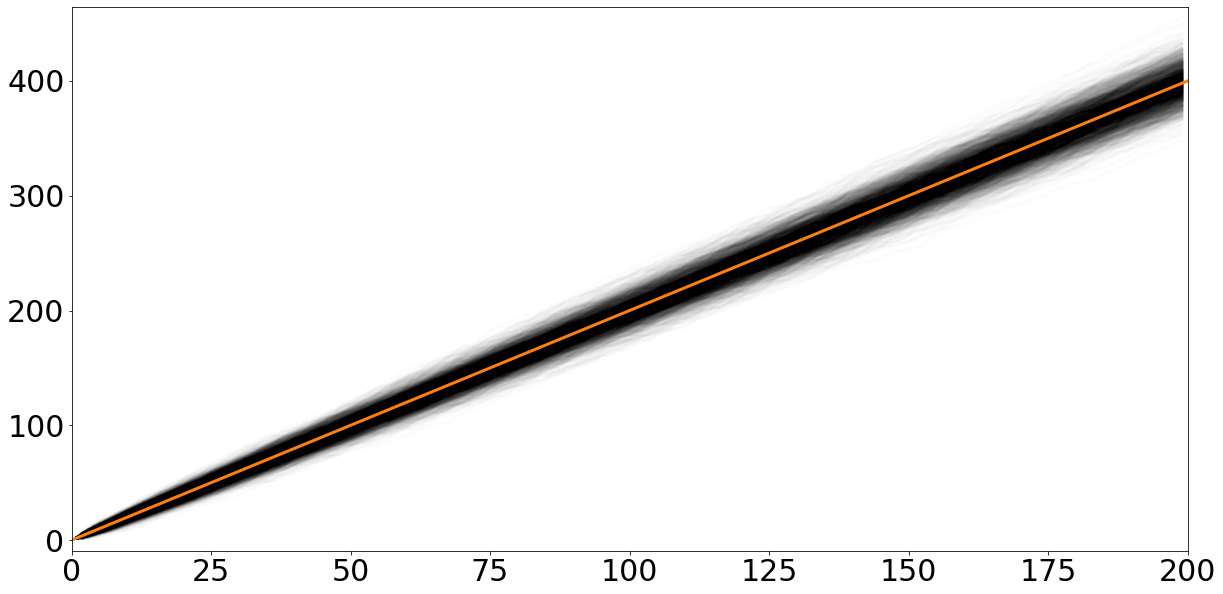

In [13]:
fig, ax = plt.subplots(figsize = (20,10))
for i in simulations:   
    data = simulations[[i]][1:]
    data["Predictor"] = results[i].predict()
    data["Predictor"].plot.line(color = "k", alpha = .01, linewidth = 3, ls = "-", ax = ax)#, label = "y-hat")
    #     x = np.linspace(list(simulations[i].index).iloc[0]), list(simulations[i].index).iloc[-1], periods - 1)
#     y = val["Intercept"] + val[i + ".shift(1)"] * x
#     ax.plot(x, y, color = "k", alpha = .01, linewidth = 3, ls = "-")#, label = "y-hat")
x = np.linspace(0, periods, periods)
y = 0 + e_bar * x
ax.plot(x,y, color = "C1", linewidth = 3)


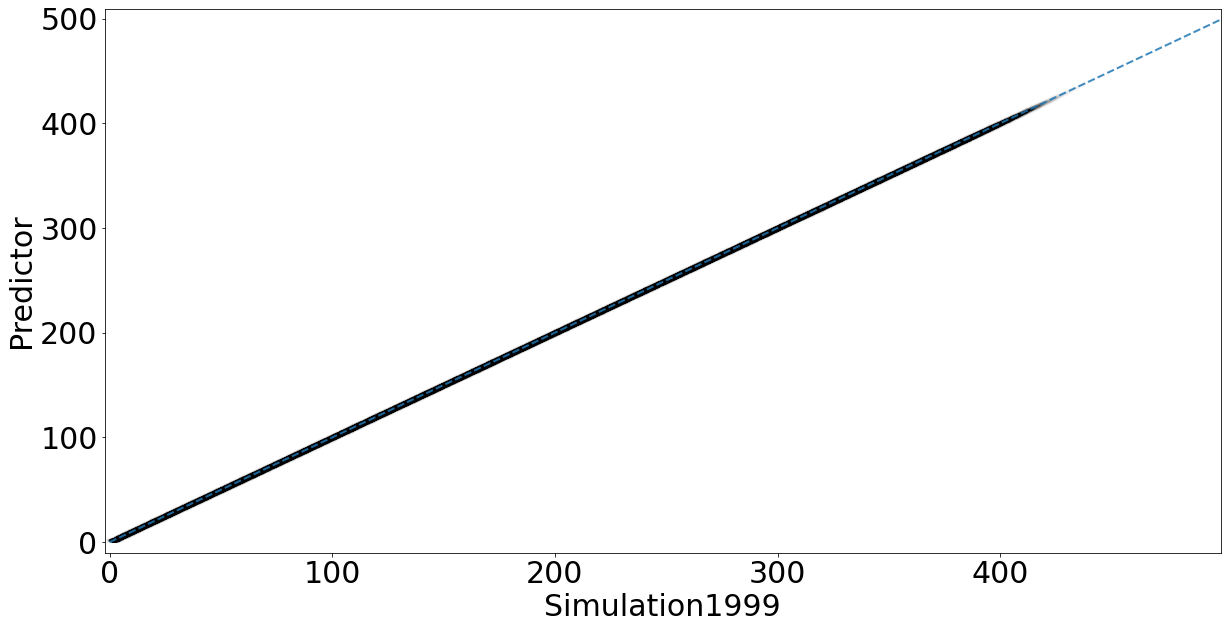

In [14]:
fig, ax = plt.subplots(figsize = (20,10))
for i in simulations:   
    data = simulations[[i]][1:]
    data["Predictor"] = results[i].predict()
    data.plot.scatter(x = i, y = "Predictor", alpha = .005, s = 10, ax = ax, color = "k")
ax.plot(np.arange(max(ax.get_xticks())), linewidth = 2, ls = "--", alpha = .85)

## 11.3. Differences of Highly Persistent Time Series


In [15]:
sim_diff = simulations.diff().dropna()
sim_diff

,Simulation0,Simulation1,Simulation2,Simulation3,Simulation4,Simulation5,Simulation6,Simulation7,Simulation8,Simulation9,...,Simulation1990,Simulation1991,Simulation1992,Simulation1993,Simulation1994,Simulation1995,Simulation1996,Simulation1997,Simulation1998,Simulation1999
1,1.595295,0.931130,2.048693,2.189868,2.613761,3.011134,4.368579,2.712502,0.750561,1.881162,...,2.150416,4.208559,1.810204,2.399945,-0.878031,2.908893,0.848377,0.676687,2.296773,3.907176
2,2.657418,2.367355,2.437216,1.753818,1.425290,1.972463,0.757283,0.933464,2.055878,2.023100,...,2.613482,3.025549,1.670911,3.706622,3.546591,1.362844,2.631670,2.401353,2.105668,1.788238
3,2.914850,1.784552,3.207199,0.738328,0.162548,2.107359,0.373265,0.349077,0.786129,2.201613,...,-0.152634,1.105482,1.172697,3.279941,1.658217,1.483485,-0.893221,0.416733,1.330938,2.540251
4,1.888202,3.730408,3.125168,1.023318,1.944829,2.923203,1.027866,1.481587,0.676699,0.803354,...,1.275109,2.179011,0.632178,2.199694,0.900768,1.675325,2.320553,2.837772,3.348898,2.281565
5,1.201513,2.356067,3.100657,0.448470,0.936069,1.813782,0.384596,2.236291,2.224674,3.026307,...,1.434162,1.915013,-0.521986,2.269714,1.107043,2.655081,2.365627,0.709035,3.241506,2.359204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.209858,1.436382,1.873332,2.783818,1.779299,0.465583,4.087740,0.965192,0.823034,3.669070,...,1.793582,0.892416,3.255106,2.107143,2.634511,1.765096,2.933160,0.966055,1.023690,2.765606
196,3.333920,2.002806,1.639659,1.457121,2.265671,1.964018,1.105499,2.985299,1.575292,3.300754,...,-0.496843,3.308212,2.051396,1.830601,2.643261,2.611993,1.513626,3.585869,0.047539,1.487075
197,1.724889,3.350279,1.493686,1.571990,1.358304,0.994268,3.054379,1.996369,0.659337,3.262020,...,2.865113,2.751398,1.798410,1.851469,2.621228,4.109210,4.683031,2.759353,1.737312,2.354204
198,3.283112,2.129149,0.044324,1.734698,0.913107,2.596668,1.774940,3.321894,1.935204,2.785630,...,2.716931,2.444866,3.603824,0.197359,3.095246,-0.127138,2.845967,1.863676,1.517301,2.305520


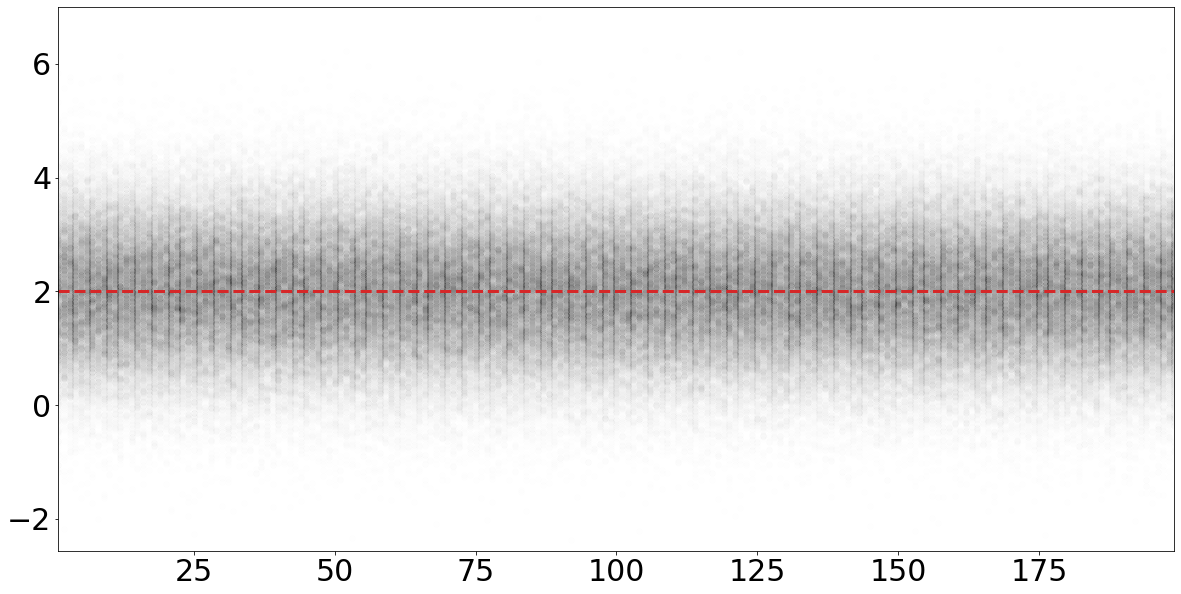

In [16]:
fig, ax = plt.subplots(figsize = (20,10))
sim_diff.plot.line(alpha = .002,
                             ls = " ",
                             marker = "o",
                             markersize = 6,
                             color = "k",
                      ax = ax, 
                      legend = False)
ax.axhline(e_bar, ls = "--", color = "C3", linewidth = 3)


In [17]:
count_sig = 0
p_val = 0.05
for i in sim_diff:
    formula = i + " ~ " + i + ".shift(1) + 1"
    reg = smf.ols(formula = formula,
        data =sim_diff)
    results[i] = reg.fit()
    summary = OLS_summary(results[i])
    if summary.iloc[1]["$$P>|t|$$"] <= p_val:
        count_sig += 1 

# compare number of statistically significant estimates to the asserted p_val
count_sig / len(sim_diff.keys())

0.045

In [18]:
count_sig

90

### Testing for Serial Correlation

#### Regress lag of error against error

$$\hat{u_t} = \hat{\rho}\hat{u_{t-1}}+ k$$

In [19]:
phillips = woo.dataWoo("phillips")
periods = len(phillips.index)

# define yearly time series index
pd.to_datetime(phillips["year"])
phillips.set_index("year", inplace = True)
yt96 = phillips.index <= 1996
formula = "Q('inf') ~ unem"
reg_s = smf.ols(formula = formula,
               data = phillips,
               subset = yt96)
results_s = reg_s.fit()
OLS_summary(results_s)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0527$$,,,,
Intercept,1.4236,0.8282,0.4118,1.7190
unem,0.4676,1.6174,0.1125,0.2891


['Intercept', 'unem']
Q('inf')


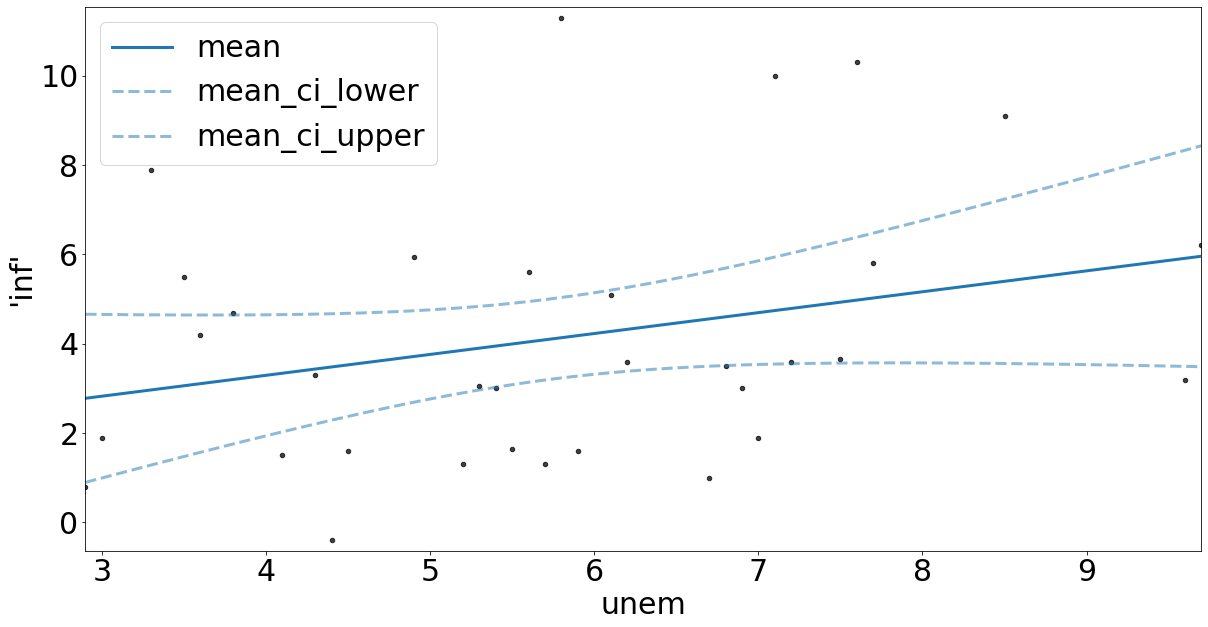

In [20]:
build_estimator(phillips, results_s, "Q('inf')")
build_smooth_multiple_regression_estimator(reg_s, phillips)

In [21]:
# residuals and AR(1) test:
phillips["resid_s"] = results_s.resid
phillips["resid_s_lag1"] = phillips["resid_s"].shift() 
reg_df = phillips[["resid_s", "resid_s_lag1"]]
formula = "resid_s ~ resid_s_lag1 + 0"
reg = smf.ols(formula = formula,
             data = reg_df,
             subset = yt96)
results = reg.fit()
# for bivariate regression, the squareroot of r-squared 
# is the correlation between the variables 

print(results.rsquared ** .5, reg_df.corr().iloc[0][1])
OLS_summary(results)

0.5876936180647698 0.5882587556173747


,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.3454$$,,,,
resid_s_lag1,0.5727,4.9797,0.0,0.115


#### According to the t-statistic for $\hat{\rho}$, the estimated error term is serially correlated. 

#### We can also check the Durbin-Watson Statistic:

$$DW = \frac{\sum_{t=2}^{n}{(\hat{u}_t - \hat{u}_{t-1})^2}}{\sum_{t=1}^{n}{\hat{u}_t^2}}$$

In [22]:
sm.stats.stattools.durbin_watson(results_s.resid)

0.802700467848626

In [23]:
sm.stats.diagnostic.acorr_breusch_godfrey(results, nlags = 1)

(5.356006336085807,
 0.020651013085524358,
 5.651911880721935,
 0.021747051510411165)

['resid_s_lag1']
resid_s


C:\Users\JLCat\GithubRepositories\Learn-Python-for-Stats-and-Econ\Projects\Graduate Macro Notebooks\supplementaryFunctions.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\widehat{" + y_name + "}$$"] = results.fittedvalues
C:\Users\JLCat\GithubRepositories\Learn-Python-for-Stats-and-Econ\Projects\Graduate Macro Notebooks\supplementaryFunctions.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\hat{u}$$"] = results.resid


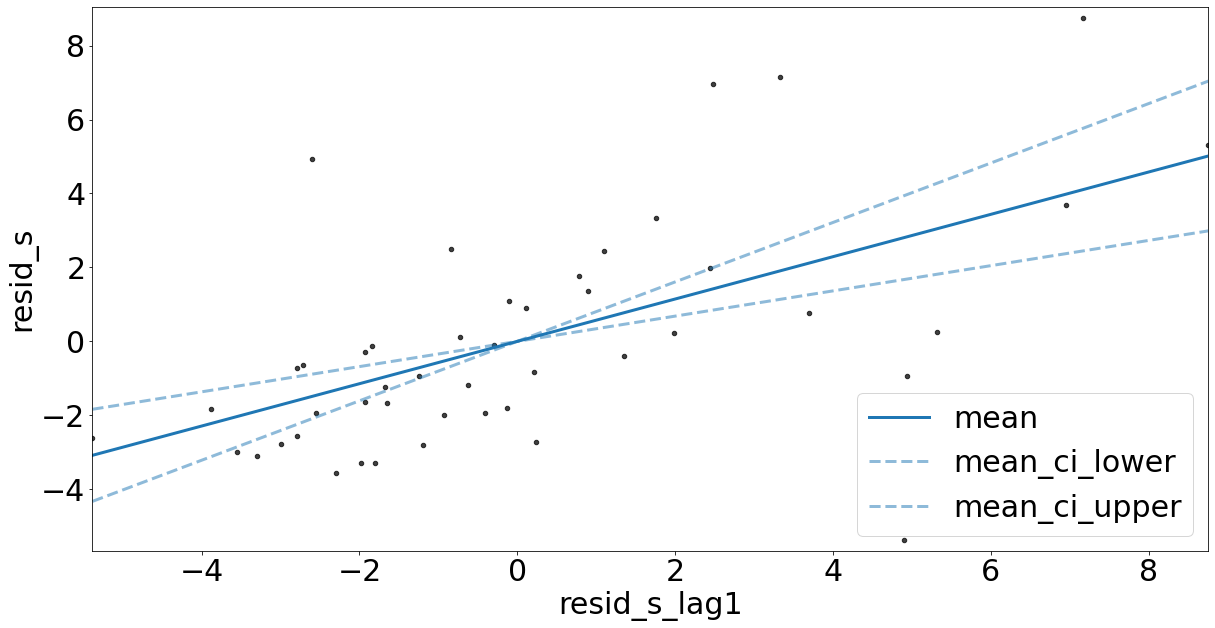

In [24]:
build_estimator(reg_df, results_s, "resid_s")
build_smooth_multiple_regression_estimator(reg, reg_df)

In [25]:
# probably most accurate model

formula = "unem ~ Q('inf') + Q('inf').shift() + 0"
reg_s = smf.ols(formula = formula,
               data = phillips.diff(),
               subset = yt96)
results_s = reg_s.fit()
OLS_summary(results_s)


,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.1351$$,,,,
Q('inf'),-0.1338,-1.9538,0.0570,0.0685
Q('inf').shift(),0.1027,1.7659,0.0842,0.0582


In [26]:
hac_results = reg_s.fit(cov_type="HAC", cov_kwds={"maxlags":2})
OLS_summary(hac_results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.1351$$,,,,
Q('inf'),-0.1338,-2.4902,0.0128,0.0537
Q('inf').shift(),0.1027,1.2222,0.2216,0.0841


In [27]:
# residuals and AR(1) test:
phillips["resid_s"] = results_s.resid
phillips["resid_s_lag1"] = phillips["resid_s"].shift() 
formula = "resid_s ~ resid_s_lag1"
reg = smf.ols(formula = formula,
             data = phillips,
             subset = yt96)
results = reg.fit()
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0016$$,,,,
Intercept,-0.0011,-0.0073,0.9942,0.1519
resid_s_lag1,-0.0402,-0.2682,0.7898,0.1500
